In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

% matplotlib.inline
plt.style.use('ggplot')

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
df = pd.read_csv("/Users/fanyang/Documents/lendingclub/2018_12_21/loan_feature_selected.csv")

In [3]:
df.head(3)

,Unnamed: 0,next_pymnt_binary,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,emp_length,home_ownership,verification_status,addr_state,state_mean_int,purpose,initial_list_status,income_level,delinq_binary,late_fee_binary
0,1,0,3000,12.69,67.79,80000.0,17.94,0,0,38,...,1 year,RENT,Verified,OR,lowmmedium,other,f,mediumhigh,no,no
1,2,0,7000,15.96,170.08,47004.0,23.51,0,1,188,...,8 years,RENT,Not Verified,NC,mediumhigh,debt_consolidation,f,lowmedium,no,no
2,3,0,10000,15.96,242.97,29120.0,22.83,0,1,68,...,2 years,RENT,Verified,FL,lowmmedium,debt_consolidation,f,low,no,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601779 entries, 0 to 601778
Data columns (total 30 columns):
Unnamed: 0                601779 non-null int64
next_pymnt_binary         601779 non-null int64
loan_amnt                 601779 non-null int64
int_rate                  601779 non-null float64
installment               601779 non-null float64
annual_inc                601779 non-null float64
dti                       601779 non-null float64
delinq_2yrs               601779 non-null int64
inq_last_6mths            601779 non-null int64
mths_since_last_delinq    601779 non-null int64
open_acc                  601779 non-null int64
pub_rec                   601779 non-null int64
revol_bal                 601779 non-null float64
total_acc                 601779 non-null int64
pymnt_pct                 601779 non-null float64
tot_cur_bal               601779 non-null float64
total_rev_hi_lim          601779 non-null float64
cr_his_days               601779 non-null int64
term     

In [5]:
df.shape

(601779, 30)

In [6]:
df = df.drop(columns='Unnamed: 0', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601779 entries, 0 to 601778
Data columns (total 29 columns):
next_pymnt_binary         601779 non-null int64
loan_amnt                 601779 non-null int64
int_rate                  601779 non-null float64
installment               601779 non-null float64
annual_inc                601779 non-null float64
dti                       601779 non-null float64
delinq_2yrs               601779 non-null int64
inq_last_6mths            601779 non-null int64
mths_since_last_delinq    601779 non-null int64
open_acc                  601779 non-null int64
pub_rec                   601779 non-null int64
revol_bal                 601779 non-null float64
total_acc                 601779 non-null int64
pymnt_pct                 601779 non-null float64
tot_cur_bal               601779 non-null float64
total_rev_hi_lim          601779 non-null float64
cr_his_days               601779 non-null int64
term                      601779 non-null object
grade   

In [8]:
numerical_feature = ['next_pymnt_binary',
                    'cr_his_days', 'loan_amnt', 'int_rate', 'installment', 'annual_inc',
                    'dti', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'total_acc', 
                    'pub_rec', 'revol_bal', 'pymnt_pct', 'tot_cur_bal', 'total_rev_hi_lim']

In [10]:
df_numerical = df[numerical_feature]

In [46]:
categorical_feature = ['term', 'grade', 'emp_length', 'home_ownership',
                    'state_mean_int' , 'initial_list_status', 'delinq_binary', 
                    'late_fee_binary', 'verification_status']

In [47]:
df_categorical = pd.get_dummies(df[categorical_feature], columns=categorical_feature)

In [48]:
df_selected = df_numerical.join(df_categorical)

In [49]:
df_selected.shape

(601779, 52)

In [50]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601779 entries, 0 to 601778
Data columns (total 52 columns):
next_pymnt_binary                   601779 non-null int64
cr_his_days                         601779 non-null int64
loan_amnt                           601779 non-null int64
int_rate                            601779 non-null float64
installment                         601779 non-null float64
annual_inc                          601779 non-null float64
dti                                 601779 non-null float64
inq_last_6mths                      601779 non-null int64
mths_since_last_delinq              601779 non-null int64
open_acc                            601779 non-null int64
total_acc                           601779 non-null int64
pub_rec                             601779 non-null int64
revol_bal                           601779 non-null float64
pymnt_pct                           601779 non-null float64
tot_cur_bal                         601779 non-null float64
total

In [51]:
y = df_selected['next_pymnt_binary']
X = df_selected.drop('next_pymnt_binary', axis=1)

In [52]:
X.shape

(601779, 51)

In [53]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: next_pymnt_binary, dtype: int64

In [54]:
# split data by sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [55]:
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [57]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [58]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

### logistic regression

              train      test
metrics                      
AUC        0.585637  0.585419
Accuracy   0.847732  0.847574
Precision  0.000000  0.250000
Recall     0.000000  0.000036
f1-score   0.000000  0.000073


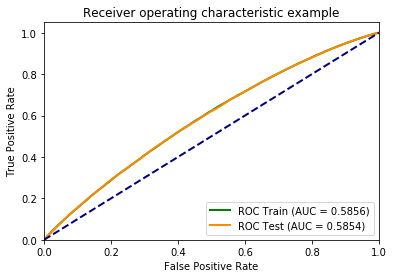

In [59]:
# Import logistic regression from sklearn
#from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegressionCV

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegressionCV(cv=5, random_state=0)
# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Random Forest

              train      test
metrics                      
AUC        0.846512  0.721911
Accuracy   0.851006  0.847813
Precision  0.917833  0.543340
Recall     0.023513  0.009340
f1-score   0.045850  0.018364


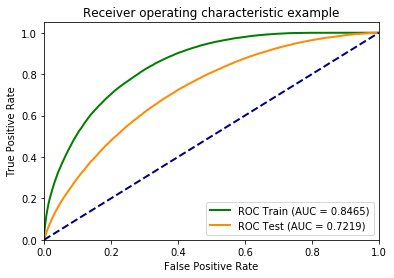

In [60]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 100,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

In [61]:
feature_importances_rf = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [67]:
feature_importances_rf.head()

,importance
pymnt_pct,0.120612
int_rate,0.119927
dti,0.057330
tot_cur_bal,0.055505
revol_bal,0.048809


In [66]:
feature_importances_rf.tail()

,importance
late_fee_binary_yes,0.000989
emp_length_9 years,0.000779
emp_length_7 years,0.000767
emp_length_6 years,0.000706
home_ownership_OTHER,0.000000


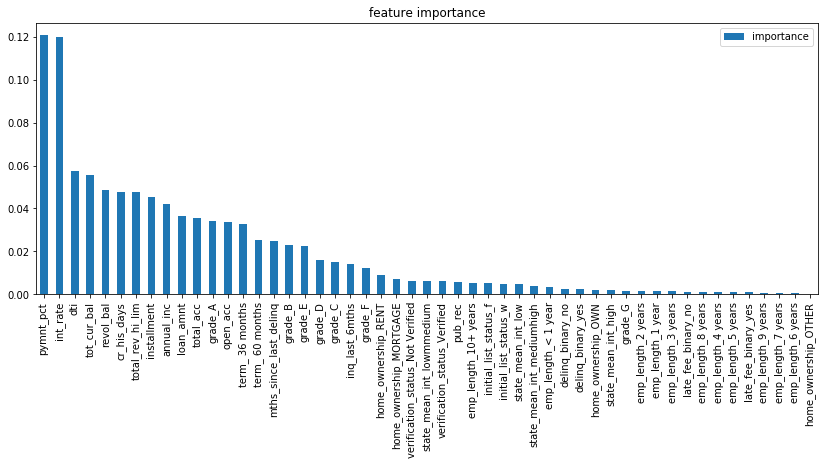

In [79]:
feature_importances_rf.plot(kind='bar', figsize=(14, 5), title= 'feature importance')

In [ ]:
XGBoost

In [85]:
X_train=X_train.rename(columns = {"emp_length_< 1 year":"emp_length_less 1 year"})
y_train=y_train.rename(columns = {"emp_length_< 1 year":"emp_length_less 1 year"})
X_test=X_test.rename(columns = {"emp_length_< 1 year":"emp_length_less 1 year"})
y_test=y_test.rename(columns = {"emp_length_< 1 year":"emp_length_less 1 year"})

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


              train      test
metrics                      
AUC        0.763696  0.725850
Accuracy   0.851507  0.847480
Precision  0.714054  0.493426
Recall     0.041194  0.025912
f1-score   0.077894  0.049239


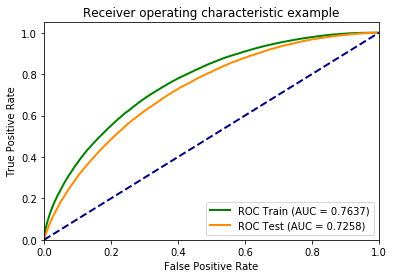

In [88]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
clf.fit(X_train, y_train)
train_test_model(clf, X_train, y_train, X_test, y_test)